# Bibliotecas

In [191]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
from autoviz.AutoViz_Class import AutoViz_Class
import ppscore as pps
%matplotlib inline
pd.set_option('display.max_columns', 500)


In [82]:
port1=pd.read_csv('estaticos_portfolio1.csv')

In [83]:
port2=pd.read_csv('estaticos_portfolio2.csv')

In [84]:
port3=pd.read_csv('estaticos_portfolio3.csv')

In [85]:
market=pd.read_csv('estaticos_market.csv')

In [86]:
market.drop(['Unnamed: 0','id'],axis=1,inplace= True)

# Análise Exploratoria

In [87]:
port1.shape

(555, 182)

In [88]:
port2.shape

(566, 2)

In [89]:
port3.shape

(265, 2)

In [90]:
market.shape

(462298, 180)

In [192]:
market.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE 

In [91]:
for i in market.columns:
    print(i)

fl_matriz
de_natureza_juridica
sg_uf
natureza_juridica_macro
de_ramo
setor
idade_empresa_anos
idade_emp_cat
fl_me
fl_sa
fl_epp
fl_mei
fl_ltda
dt_situacao
fl_st_especial
fl_email
fl_telefone
fl_rm
nm_divisao
nm_segmento
fl_spa
fl_antt
fl_veiculo
vl_total_tancagem
vl_total_veiculos_antt
vl_total_veiculos_leves
vl_total_veiculos_pesados
fl_optante_simples
qt_art
vl_total_veiculos_pesados_grupo
vl_total_veiculos_leves_grupo
vl_total_tancagem_grupo
vl_total_veiculos_antt_grupo
vl_potenc_cons_oleo_gas
fl_optante_simei
sg_uf_matriz
de_saude_tributaria
de_saude_rescencia
nu_meses_rescencia
de_nivel_atividade
de_indicador_telefone
fl_simples_irregular
vl_frota
empsetorcensitariofaixarendapopulacao
nm_meso_regiao
nm_micro_regiao
fl_passivel_iss
qt_socios
qt_socios_pf
qt_socios_pj
idade_media_socios
idade_maxima_socios
idade_minima_socios
qt_socios_st_regular
qt_socios_st_suspensa
qt_socios_masculino
qt_socios_feminino
qt_socios_pep
qt_alteracao_socio_total
qt_alteracao_socio_90d
qt_alteracao_soc

In [93]:
market.shape

(462298, 180)

In [94]:
#Criando um dataframe auxiliar para analises

aux = pd.DataFrame({'colunas' : market.columns,
                    'tipo': market.dtypes,
                    'missing' : market.isna().sum(),
                    'size' : market.shape[0],
                    'unicos': market.nunique()})

In [95]:
aux['percentual'] = round(aux['missing'] / aux['size'],2)
aux['completa'] = ['completa' if x == 0 else 'faltante' for x in aux['percentual']]

In [133]:
#Separando em categoriga e numerica

col_num= list(aux[((aux['tipo'] != 'object') &
                    (aux['tipo'] != 'bool'))]['colunas'])
col_cat=list(aux[((aux['tipo'] != 'float64') &
                    (aux['tipo'] != 'int64'))]['colunas'])

# Observando as colunas numéricas

In [136]:
#Excluindo os dados com mais de 70% de valores nulos

col_num_70= list(aux[((aux['tipo'] != 'object') &
                    (aux['tipo'] != 'bool')  &
                    (aux['percentual'] <= 0.7))]['colunas'])

In [152]:
# Limpando os dados com dabl
market_clean_num = dabl.clean(market[col_num_70], verbose=1)

Detected feature types:
16 float, 1 int, 0 object, 0 date, 0 other
Interpreted as:
continuous      14
dirty_float      0
low_card_int     1
categorical      0
date             0
free_string      0
useless          2
dtype: int64


## Verificando os nulos

In [162]:
market_clean_num.isnull().sum().sort_values(ascending=False)

qt_socios_feminino                       317269
qt_socios_masculino                      267183
qt_socios_st_regular                     154917
idade_minima_socios                      151602
idade_maxima_socios                      151602
idade_media_socios                       151602
empsetorcensitariofaixarendapopulacao    143829
qt_socios_pf                             115091
qt_socios                                115091
nu_meses_rescencia                        45276
vl_faturamento_estimado_grupo_aux         27513
vl_faturamento_estimado_aux               27513
vl_total_veiculos_leves_grupo              1927
qt_filiais                                    0
idade_empresa_anos                            0
dtype: int64

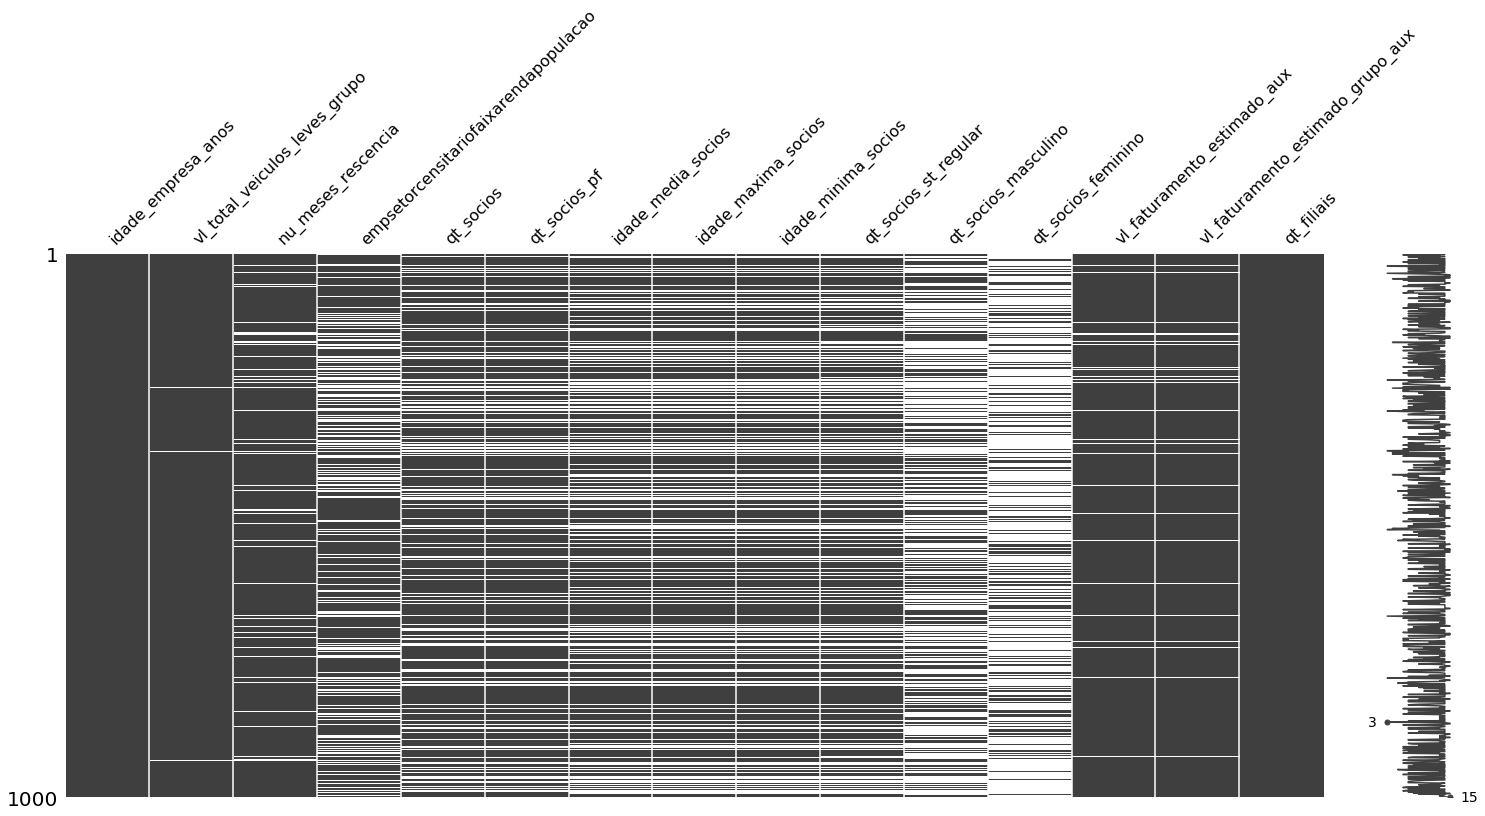

In [163]:
msno.matrix(market_clean_num.sample(1000))
plt.show()

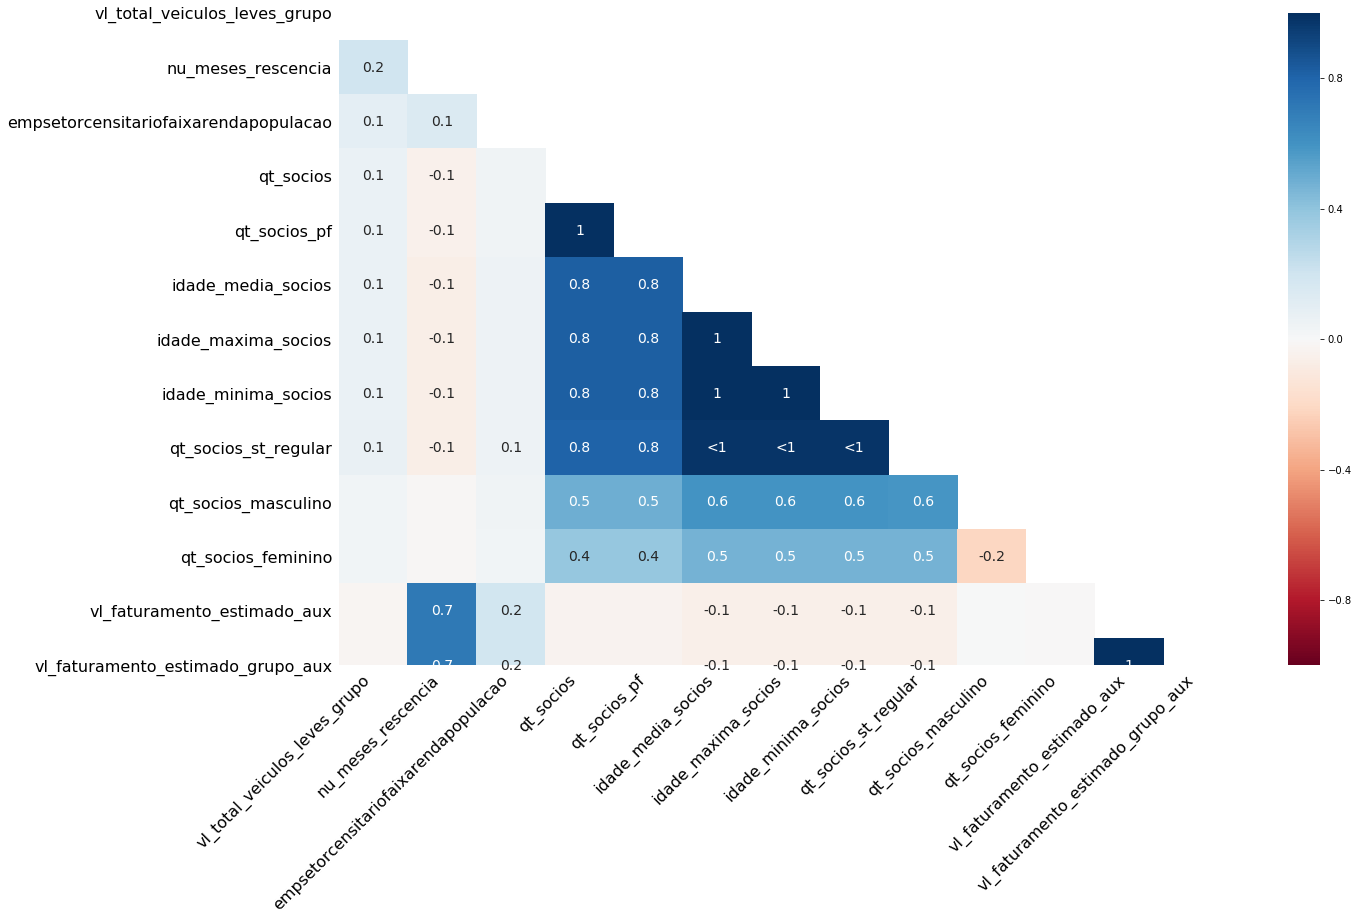

In [164]:
#Observando as correlações entre os valores nulos
msno.heatmap(market_clean_num)
plt.show()

## Verificando as correlações

In [218]:

def heatmap(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(df, cmap="Blues",mask=mask, square=True, linewidths=0.5, annot=False,cbar=False,yticklabels=False)
    ax.set_title('PPS matrix')
    return ax
def corr_heatmap(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(df,cmap="Blues",mask=mask, square=True, linewidths=0.5, annot=False,cbar=False)
    ax.set_title('Correlation matrix')
    return ax

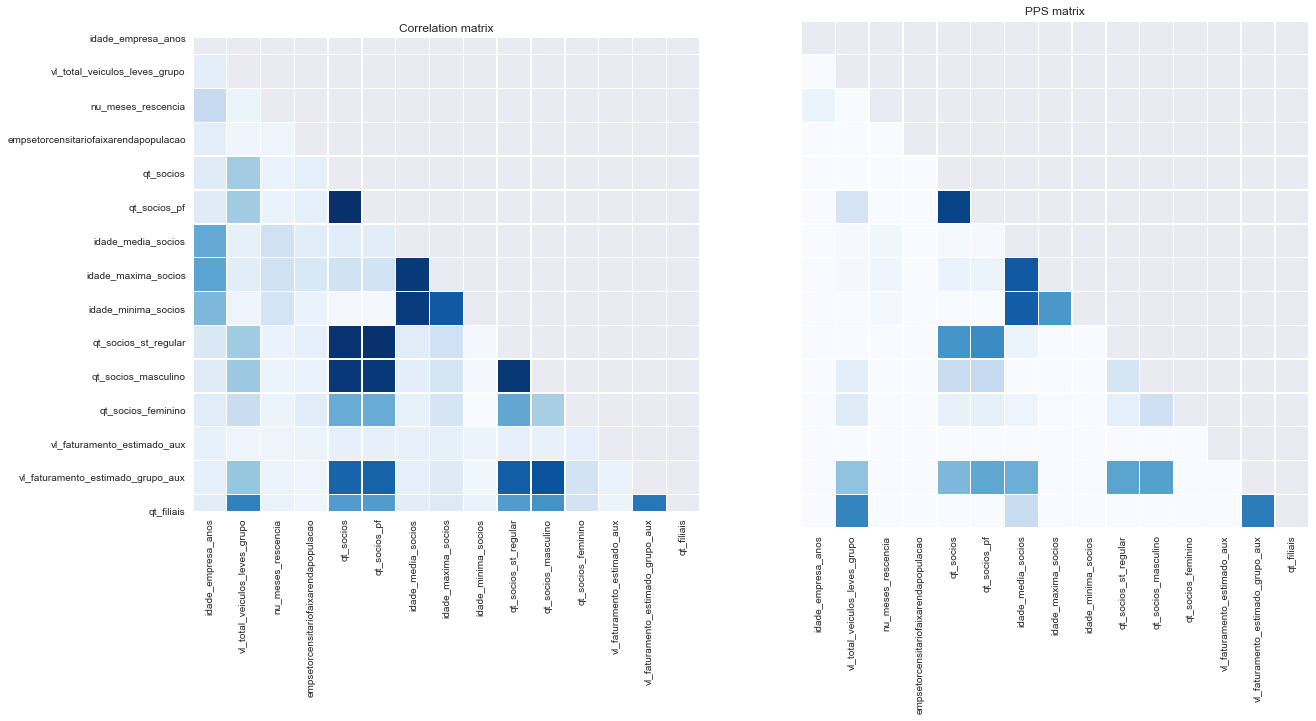

In [219]:
f = plt.figure(figsize=(20,10))
f.add_subplot(1,2, 1)
corr_heatmap(market_clean_num.corr())

f.add_subplot(1,2, 2)
matrix = pps.matrix(market_clean_num)
heatmap(matrix)

# Observando as colunas categoricas

In [140]:
market[col_cat].isnull().sum().sort_values(ascending=False)

de_indicador_telefone                  418405
fl_optante_simei                        82713
fl_optante_simples                      82713
nm_micro_regiao                         58698
nm_meso_regiao                          58698
de_faixa_faturamento_estimado_grupo     27513
de_faixa_faturamento_estimado           27513
de_saude_rescencia                      14851
de_saude_tributaria                     14851
de_nivel_atividade                      11168
sg_uf_matriz                             1939
fl_spa                                   1927
setor                                    1927
nm_segmento                              1927
nm_divisao                               1927
fl_antt                                  1927
fl_simples_irregular                     1927
fl_passivel_iss                          1927
fl_veiculo                               1927
dt_situacao                                 6
fl_me                                       0
de_natureza_juridica              

In [143]:
col_cat_70= list(aux[((aux['tipo'] != 'float64') &
                    (aux['tipo'] != 'int64')  &
                    (aux['percentual'] <= 0.7))]['colunas'])

In [144]:
market[col_cat_70].isnull().sum().sort_values(ascending=False)

fl_optante_simei                       82713
fl_optante_simples                     82713
nm_micro_regiao                        58698
nm_meso_regiao                         58698
de_faixa_faturamento_estimado_grupo    27513
de_faixa_faturamento_estimado          27513
de_saude_rescencia                     14851
de_saude_tributaria                    14851
de_nivel_atividade                     11168
sg_uf_matriz                            1939
fl_spa                                  1927
setor                                   1927
nm_divisao                              1927
nm_segmento                             1927
fl_veiculo                              1927
fl_antt                                 1927
fl_simples_irregular                    1927
fl_passivel_iss                         1927
dt_situacao                                6
fl_me                                      0
de_natureza_juridica                       0
sg_uf                                      0
natureza_j